In [1]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
import numpy as np
#from imgaug import augmenters as iaa
#import cv2
from keras.layers.normalization import BatchNormalization
#import seaborn as sns
import pandas as pd 
from keras import initializers
from keras import optimizers
import keras.backend as K
import tensorflow as tf
from keras.models import Model

In [2]:
path = 'C:/Users/Havoc/Downloads/dataset/'


# define paths
train_air_trapping_dir = path + 'Train/Air_trapping/'
train_aortic_elongation_dir = path + 'Train/Aortic_elongation/'
train_calcified_granuloma_dir = path + 'Train/Air_trapping/'
train_calcified_granuloma_dir = path + 'Train/Calcified_granuloma/'
train_callus_rib_fracture_dir = path + 'Train/Callus_rib_fracture/'
train_hiatal_hernia_dir = path + 'Train/Hiatal_hernia/'
train_laminar_atelectasis_fracture_dir = path + 'Train/Laminar_atelectasis/'
train_pleural_effusion_dir = path + 'Train/Pleural_effusion/'

test_air_trapping_dir = path + 'Test/Air_trapping/'
test_aortic_elongation_dir = path + 'Test/Aortic_elongation/'
test_calcified_granuloma_dir = path + 'Test/Calcified_granuloma/'
test_callus_rib_fracture_dir = path + 'Test/Callus_rib_fracture/'
test_hiatal_hernia_dir = path + 'Test/Hiatal_hernia/'
test_laminar_atelectasis_fracture_dir = path + 'Test/Laminar_atelectasis/'
test_pleural_effusion_dir = path + 'Test/Pleural_effusion/'

val_air_trapping_dir = path + 'val/Air_trapping/'
val_aortic_elongation_dir = path + 'val/Aortic_elongation/'
val_calcified_granuloma_dir = path + 'val/Calcified_granuloma/'
val_callus_rib_fracture_dir = path + 'val/Callus_rib_fracture/'
val_hiatal_hernia_dir = path + 'val/Hiatal_hernia/'
val_laminar_atelectasis_fracture_dir = path + 'val/Laminar_atelectasis/'
val_pleural_effusion_dir = path + 'val/Pleural_effusion/'


# find all files, our files has extension jpeg
#train_normal_cases = glob.glob(train_normal_dir + '*png')
train_air_trapping_cases = glob.glob(train_air_trapping_dir + '*png')
train_aortic_elongation_cases = glob.glob(train_aortic_elongation_dir + '*png')
train_calcified_granuloma_cases = glob.glob(train_calcified_granuloma_dir + '*png')
train_callus_rib_fracture_cases = glob.glob(train_callus_rib_fracture_dir + '*png')
train_hiatal_hernia_cases = glob.glob(train_hiatal_hernia_dir + '*png')
train_laminar_atelectasis_fracture_cases = glob.glob(train_laminar_atelectasis_fracture_dir + '*png')
train_pleural_effusion_cases = glob.glob(train_pleural_effusion_dir + '*png')

test_air_trapping_cases = glob.glob(test_air_trapping_dir + '*png')
test_aortic_elongation_cases = glob.glob(test_aortic_elongation_dir + '*png')
test_calcified_granuloma_cases = glob.glob(test_calcified_granuloma_dir + '*png')
test_callus_rib_fracture_cases = glob.glob(test_callus_rib_fracture_dir + '*png')
test_hiatal_hernia_cases = glob.glob(test_hiatal_hernia_dir + '*png')
test_laminar_atelectasis_fracture_cases = glob.glob(test_laminar_atelectasis_fracture_dir + '*png')
test_pleural_effusion_cases = glob.glob(test_pleural_effusion_dir + '*png')

val_air_trapping_cases = glob.glob(val_air_trapping_dir + '*png')
val_aortic_elongation_cases = glob.glob(val_aortic_elongation_dir + '*png')
val_calcified_granuloma_cases = glob.glob(val_calcified_granuloma_dir + '*png')
val_callus_rib_fracture_cases = glob.glob(val_callus_rib_fracture_dir + '*png')
val_hiatal_hernia_cases = glob.glob(val_hiatal_hernia_dir + '*png')
val_laminar_atelectasis_fracture_cases = glob.glob(val_laminar_atelectasis_fracture_dir + '*png')
val_pleural_effusion_cases = glob.glob(val_pleural_effusion_dir + '*png')


# make path using / instead of \\ ... this may be redudant step
'''
train_normal_cases = [x.replace('\\', '/') for x in train_normal_cases]
train_pneu_cases = [x.replace('\\', '/') for x in train_pneu_cases]

test_normal_cases = [x.replace('\\', '/') for x in test_normal_cases]
test_pneu_cases = [x.replace('\\', '/') for x in test_pneu_cases]
val_normal_cases = [x.replace('\\', '/') for x in val_normal_cases]
val_pneu_cases = [x.replace('\\', '/') for x in val_pneu_cases]

'''

# create lists for train, test & validation cases, create labels as well
train_list = []
test_list = []
val_list = []

for x in train_air_trapping_cases:
    train_list.append([x, 0])
    
for x in train_aortic_elongation_cases:
    train_list.append([x, 1])

for x in train_calcified_granuloma_cases:
    train_list.append([x, 2])
    
for x in train_callus_rib_fracture_cases:
    train_list.append([x, 3])

for x in train_hiatal_hernia_cases:
    train_list.append([x,4])
    
for x in train_laminar_atelectasis_fracture_cases:
    train_list.append([x,5])
    
for x in train_pleural_effusion_cases:
    train_list.append([x,6])

for x in test_air_trapping_cases:
    test_list.append([x, 0])
    
for x in test_aortic_elongation_cases:
    test_list.append([x, 1])    

for x in test_calcified_granuloma_cases:
    test_list.append([x, 2])
    
for x in test_callus_rib_fracture_cases:
    test_list.append([x, 3])

for x in test_hiatal_hernia_cases:
    test_list.append([x,4])
    
for x in test_laminar_atelectasis_fracture_cases:
    test_list.append([x,5])
    
for x in test_pleural_effusion_cases:
    test_list.append([x,6])
    
for x in val_air_trapping_cases:
    val_list.append([x, 0])
    
for x in val_aortic_elongation_cases:
    val_list.append([x, 1])
    
for x in val_calcified_granuloma_cases:
    val_list.append([x, 2])
    
for x in val_callus_rib_fracture_cases:
    val_list.append([x, 3])

for x in val_hiatal_hernia_cases:
    val_list.append([x,4])
    
for x in val_laminar_atelectasis_fracture_cases:
    val_list.append([x,5])
    
for x in val_pleural_effusion_cases:
    val_list.append([x,6])


# shuffle/randomize data as they were loaded in order: normal cases, then pneumonia cases
rn.shuffle(train_list)
rn.shuffle(test_list)
rn.shuffle(val_list)


# create dataframes
train_df = pd.DataFrame(train_list, columns=['image', 'label'])
test_df = pd.DataFrame(test_list, columns=['image', 'label'])
val_df = pd.DataFrame(val_list, columns=['image', 'label'])

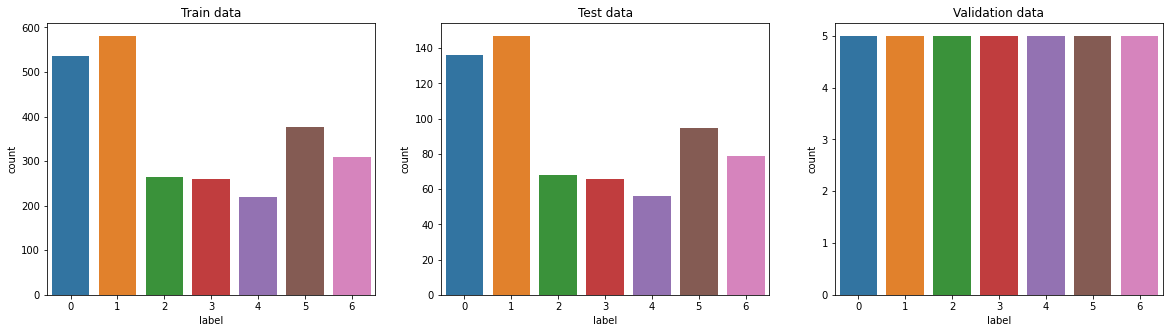

In [3]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(train_df['label'])
plt.title('Train data')

plt.subplot(1,3,2)
sns.countplot(test_df['label'])
plt.title('Test data')

plt.subplot(1,3,3)
sns.countplot(val_df['label'])
plt.title('Validation data')

plt.show()

In [4]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196, 196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    
    return img

def compose_dataset(df):
    data = []
    labels = []

    for img_path, label in df.values:
        data.append(process_data(img_path))
        labels.append(label)
        
    return np.array(data), np.array(labels)

In [5]:
X_train, y_train = compose_dataset(train_df)
X_test, y_test = compose_dataset(test_df)
X_val, y_val = compose_dataset(val_df)

print('Train data shape: {}, Labels shape: {}'.format(X_train.shape, y_train.shape))
print('Test data shape: {}, Labels shape: {}'.format(X_test.shape, y_test.shape))
print('Validation data shape: {}, Labels shape: {}'.format(X_val.shape, y_val.shape))

Train data shape: (2548, 196, 196, 1), Labels shape: (2548,)
Test data shape: (647, 196, 196, 1), Labels shape: (647,)
Validation data shape: (35, 196, 196, 1), Labels shape: (35,)


In [6]:
# define generator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)



# fit generator on our train features
datagen.fit(X_train)

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [8]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.optimizers import Adam, RMSprop

In [9]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

callback = EarlyStopping(monitor='loss', patience=6) 
history = model.fit(datagen.flow(X_train,y_train, batch_size=8), validation_data=(X_test, y_test), epochs = 500, verbose = 1, callbacks=[callback])
#, class_weight={0:6.0, 1:0.5}

Epoch 1/500
319/319 [==============================] - 5s 16ms/step - loss: 1.8976 - accuracy: 0.2319 - val_loss: 1.8830 - val_accuracy: 0.2148
Epoch 2/500
319/319 [==============================] - 4s 14ms/step - loss: 1.8703 - accuracy: 0.2826 - val_loss: 1.8408 - val_accuracy: 0.2488
Epoch 3/500
319/319 [==============================] - 5s 14ms/step - loss: 1.7988 - accuracy: 0.3265 - val_loss: 1.7267 - val_accuracy: 0.3601
Epoch 4/500
319/319 [==============================] - 5s 14ms/step - loss: 1.7527 - accuracy: 0.3485 - val_loss: 1.6832 - val_accuracy: 0.3694
Epoch 5/500
319/319 [==============================] - 4s 14ms/step - loss: 1.7163 - accuracy: 0.3638 - val_loss: 1.6969 - val_accuracy: 0.3663
Epoch 6/500
319/319 [==============================] - 4s 14ms/step - loss: 1.6974 - accuracy: 0.3724 - val_loss: 1.6378 - val_accuracy: 0.4111
Epoch 7/500
319/319 [==============================] - 4s 14ms/step - loss: 1.6829 - accuracy: 0.3748 - val_loss: 1.6227 - val_accuracy:

319/319 [==============================] - 4s 14ms/step - loss: 1.2329 - accuracy: 0.5451 - val_loss: 1.3844 - val_accuracy: 0.5193
Epoch 58/500
319/319 [==============================] - 5s 14ms/step - loss: 1.2194 - accuracy: 0.5471 - val_loss: 1.3997 - val_accuracy: 0.5240
Epoch 59/500
319/319 [==============================] - 4s 14ms/step - loss: 1.2162 - accuracy: 0.5573 - val_loss: 1.4147 - val_accuracy: 0.5193
Epoch 60/500
319/319 [==============================] - 4s 14ms/step - loss: 1.2131 - accuracy: 0.5471 - val_loss: 1.3689 - val_accuracy: 0.4992
Epoch 61/500
319/319 [==============================] - 4s 14ms/step - loss: 1.2195 - accuracy: 0.5604 - val_loss: 1.4047 - val_accuracy: 0.5039
Epoch 62/500
319/319 [==============================] - 4s 14ms/step - loss: 1.2067 - accuracy: 0.5518 - val_loss: 1.3809 - val_accuracy: 0.5008
Epoch 63/500
319/319 [==============================] - 4s 14ms/step - loss: 1.1809 - accuracy: 0.5659 - val_loss: 1.4148 - val_accuracy: 0.513

319/319 [==============================] - 4s 14ms/step - loss: 0.9205 - accuracy: 0.6472 - val_loss: 1.5120 - val_accuracy: 0.5162
Epoch 114/500
319/319 [==============================] - 5s 14ms/step - loss: 0.9337 - accuracy: 0.6515 - val_loss: 1.4821 - val_accuracy: 0.4946
Epoch 115/500
319/319 [==============================] - 5s 14ms/step - loss: 0.9095 - accuracy: 0.6656 - val_loss: 1.5178 - val_accuracy: 0.4977
Epoch 116/500
319/319 [==============================] - 5s 14ms/step - loss: 0.9194 - accuracy: 0.6554 - val_loss: 1.4951 - val_accuracy: 0.5039
Epoch 117/500
319/319 [==============================] - 4s 14ms/step - loss: 0.8898 - accuracy: 0.6731 - val_loss: 1.6597 - val_accuracy: 0.5162
Epoch 118/500
319/319 [==============================] - 4s 14ms/step - loss: 0.8885 - accuracy: 0.6609 - val_loss: 1.5495 - val_accuracy: 0.5131
Epoch 119/500
319/319 [==============================] - 4s 14ms/step - loss: 0.8773 - accuracy: 0.6684 - val_loss: 1.5234 - val_accuracy:

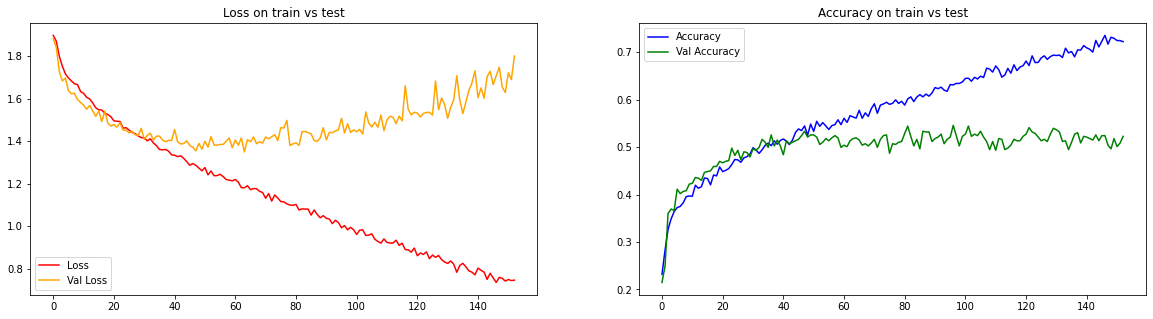

In [10]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')

plt.show()

In [11]:
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)

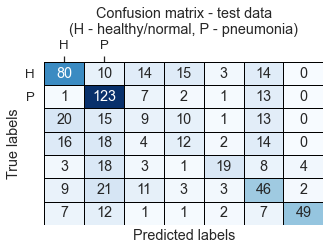

Classification report on test data
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       136
           1       0.57      0.84      0.68       147
           2       0.18      0.13      0.15        68
           3       0.27      0.18      0.22        66
           4       0.61      0.34      0.44        56
           5       0.40      0.48      0.44        95
           6       0.89      0.62      0.73        79

    accuracy                           0.52       647
   macro avg       0.50      0.45      0.46       647
weighted avg       0.52      0.52      0.51       647



In [12]:
# calculate confusion matrix & classification report
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap
plt.figure(figsize=(5,3))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['H', 'P'], yticklabels=['H', 'P'], cbar=False, cmap='Blues',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix - test data\n(H - healthy/normal, P - pneumonia)')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

In [13]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)